---
# Dataset
---

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt  # 파이플롯 사용
from IPython.display import set_matplotlib_formats
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/TaewoongKong/code_sharing/master/2016%E1%84%82%E1%85%A7%E1%86%AB_%E1%84%80%E1%85%A5%E1%86%AB%E1%84%80%E1%85%A1%E1%86%BC%E1%84%80%E1%85%A5%E1%86%B7%E1%84%8C%E1%85%B5%E1%86%AB_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5.csv")
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2016,465969,1,8,41,170.0,70.0,74.0,0.7,0.7,...,96.0,3.0,NaN,1,NaN,NaN,NaN,NaN,2.0,20171219
1,2016,565871,1,10,41,160.0,60.0,81.0,1.2,1.0,...,14.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
2,2016,115718,2,11,11,160.0,55.0,71.0,1.0,1.0,...,20.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0.0,20171219
3,2016,767524,1,6,28,180.0,70.0,79.0,1.0,0.9,...,16.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
4,2016,482178,2,9,11,160.0,60.0,85.0,0.8,1.2,...,13.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0.0,20171219


In [3]:
df.keys()

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [4]:
df = df[['허리둘레', '신장(5Cm단위)','성별코드']]
df.columns = ['waist', 'height', 'sex']

In [5]:
df_man = df.loc[df['sex'] == 1]
df_woman = df.loc[df['sex'] == 2]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. 

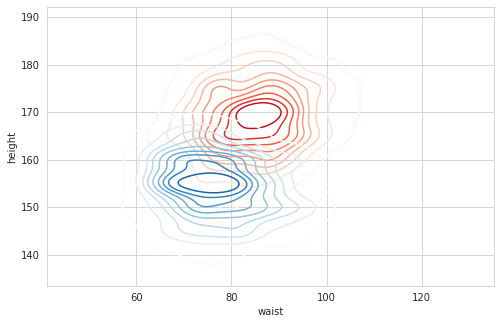

In [7]:
# 분포가 어떤지 시각화 해봅니다.
# x 축에는 허리둘레, y축에는 키를 넣었습니다
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")


ax = sns.kdeplot(df_man.waist, df_man.height, cmap="Reds", shade=False, shade_lowest=False, cbar=False)
ax = sns.kdeplot(df_woman.waist, df_woman.height, cmap="Blues", shade=False, shade_lowest=False)


red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]

In [17]:
# 정규화

df_scaled = StandardScaler().fit_transform(df[['waist','height']])

---
# PCA
---

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca.fit(df_scaled)

PCA(n_components=2)


In [19]:
df_pca = pca.transform(df_scaled)
print(df_pca.shape)

(1000, 2)


In [20]:
df_pca

array([[ 0.10788518, -1.14402725],
       [-0.13056545,  0.12585035],
       [-0.867299  , -0.6108832 ],
       ...,
       [-1.61274784, -0.60216793],
       [-1.33548497,  1.18342316],
       [ 0.91829209, -0.33362034]])

In [118]:
data_pca = pd.DataFrame(df_pca, columns=['pca_1','pca_2'])
data_pca['target'] = df.sex

data_pca

,pca_1,pca_2,target
0,0.107885,-1.144027,1
1,-0.130565,0.125850,1
2,-0.867299,-0.610883,2
3,1.230416,-1.529825,1
4,0.164128,0.420544,2
...,...,...,...
995,-0.516363,1.248381,2
996,-1.612748,-0.602168,2
997,-1.612748,-0.602168,2
998,-1.335485,1.183423,2


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


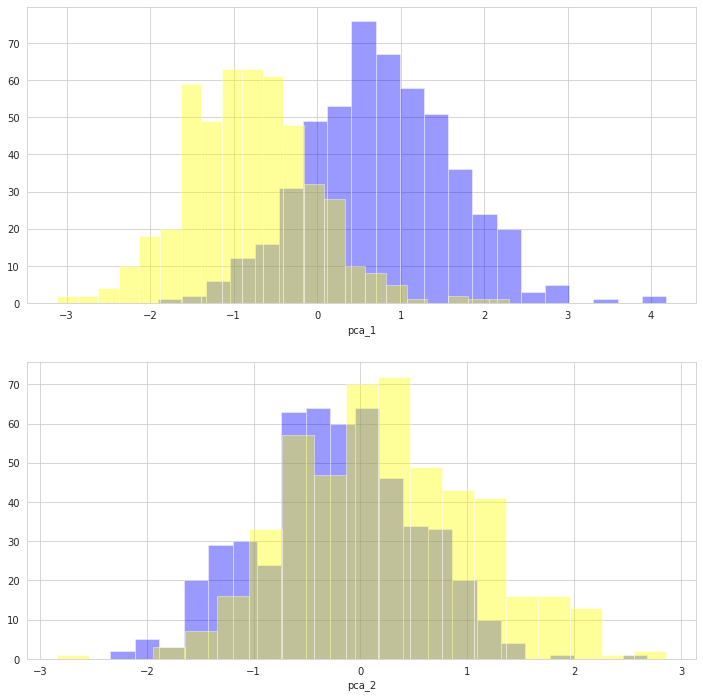

In [119]:
fig, ax = plt.subplots(2,1, figsize=(12,12))

value = ['pca_1','pca_2']
for i,name in enumerate(value) :
  sns.distplot(data_pca.loc[data_pca['target'] == 1 , name],
              hist=True,
              color = 'blue',
              kde = False,
              label = 'Man',
              ax = ax[i])

  sns.distplot(data_pca.loc[data_pca['target'] == 2 , name ],
              hist=True,
              color = 'yellow',
              kde = False,
              label = 'Woman',
              ax = ax[i])

---
# LDA
---

In [114]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
# fit()호출 시 target값 입력 
lda.fit(df_scaled, df.sex)
df_lda = lda.transform(df_scaled)
data_lda = pd.DataFrame(df_lda,columns=['lda_component'])
data_lda['target'] = df.sex

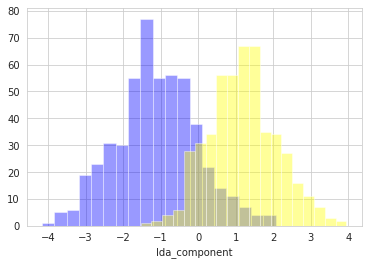

In [116]:
sns.distplot(data_lda.loc[data_lda['target'] == 1 , 'lda_component'],
            hist=True,
            color = 'blue',
            kde = False,
            label = 'Man',)

sns.distplot(data_lda.loc[data_lda['target'] == 2 , 'lda_component' ],
            hist=True,
            color = 'yellow',
            kde = False,
            label = 'Woman',)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'LDA')

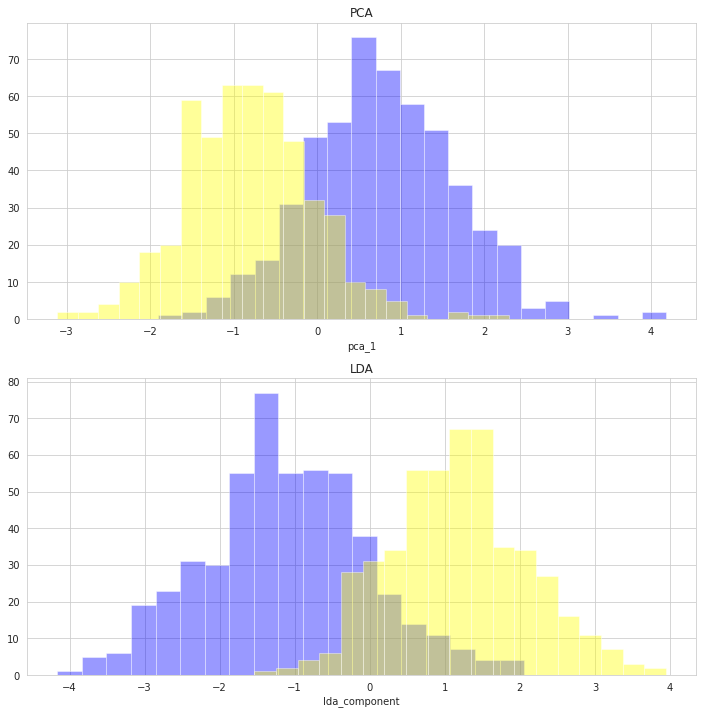

In [121]:
fig, ax = plt.subplots(2,1, figsize=(12,12))

sns.distplot(data_pca.loc[data_pca['target'] == 1 , 'pca_1'],
            hist=True, color = 'blue', kde = False, label = 'Man', ax = ax[0])

sns.distplot(data_pca.loc[data_pca['target'] == 2 , 'pca_1' ],
            hist=True, color = 'yellow', kde = False, label = 'Woman', ax = ax[0])
ax[0].set_title('PCA')

sns.distplot(data_lda.loc[data_lda['target'] == 1 , 'lda_component'],
            hist=True, color = 'blue', kde = False, label = 'Man', ax = ax[1])

sns.distplot(data_lda.loc[data_lda['target'] == 2 , 'lda_component' ],
            hist=True, color = 'yellow', kde = False, label = 'Woman', ax = ax[1])
ax[1].set_title('LDA')